# Importing Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# Importing Data

In [65]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
all_prov_df = pd.read_csv("/content/drive/MyDrive/all_province.csv")

In [67]:
all_prov_df.head()

,Unnamed: 0,Unnamed: 0.1,S.No,Province,Country_Region,Date,Day,Month,Year,Lat,Long_,Confirmed,Daily_Confirmed,Deaths,Daily_Deaths,inf_mean,inf_upper,inf_lower,seir_cumulative_mean,seir_cumulative_lower,seir_cumulative_upper,inf_cuml_mean,inf_cuml_lower,inf_cuml_upper,seir_daily_mean,seir_daily_lower,seir_daily_upper,population,mobility_mean,mobility_obs,testing_obs,pneumonia_mean,pneumonia_obs,mask_use_mean,mask_use_obs,hospital_beds_mean,hospital_beds_upper,hospital_beds_lower,icu_beds_mean,icu_beds_upper,icu_beds_lower,all_bed_capacity,icu_bed_capacity,Temp,Wind,Barometer,Visibility,Weather
0,0,0,1,Balochistan,Pakistan,3/10/2020,10,3,2020,28.328492,65.898403,1,1,0,0,4391.17,13219.63,744.92,0.0,0.0,0.0,53928.96,9160.53,212387.64,0.0,0.0,0.0,1.339837e+07,4.3490,1,1,1.0641,0,0.0006,1,25.87,106.47,0.0,8.42,34.66,0.0,6767,201,46.29,15.00,31.43,0.00,Haze.
1,0,0,3,Islamabad,Pakistan,3/10/2020,10,3,2020,33.665087,73.121219,2,2,0,0,303.78,830.03,71.07,0.0,0.0,0.0,3279.76,615.53,10734.78,0.0,0.0,0.0,2.155173e+06,3.1968,1,1,1.0688,0,0.0005,1,2.56,14.44,0.0,0.83,4.70,0.0,2567,52,33.71,0.00,0.00,0.00,Sunny.
2,0,0,5,Punjab,Pakistan,3/10/2020,10,3,2020,30.811346,72.139132,0,0,0,0,31937.11,126144.01,2945.82,0.0,0.0,0.0,198804.13,14977.53,813930.59,0.0,0.0,0.0,1.139393e+08,5.3669,1,1,1.0667,0,0.0001,1,37.36,147.77,0.0,12.16,48.10,0.0,51809,1601,61.54,5.19,56.79,23.12,Clear.
3,0,0,6,Sindh,Pakistan,3/10/2020,10,3,2020,26.009446,68.776807,0,0,0,0,7191.18,19243.21,2463.81,0.0,0.0,0.0,49319.53,16346.08,127723.64,0.0,0.0,0.0,4.990768e+07,-0.1035,1,1,1.0623,0,0.0712,1,7.79,51.86,0.0,2.53,16.88,0.0,31732,848,33.71,0.00,0.00,0.00,Sunny.
4,0,0,4,Khyber Pakhtunkhwa,Pakistan,3/10/2020,10,3,2020,34.485332,72.091690,0,0,0,0,11384.85,35439.52,1084.85,0.0,0.0,0.0,85730.58,6780.53,253710.52,0.0,0.0,0.0,3.810047e+07,5.5444,1,1,1.0689,0,0.0000,1,56.19,196.56,0.0,18.29,63.98,0.0,23948,643,48.80,4.64,49.20,23.21,Fog.


# Data Cleaning (W.R.T this notebook)

In [68]:
columns = ["Confirmed", "Daily_Confirmed", "Deaths", "Daily_Deaths", "inf_mean", "inf_upper", "inf_lower", "seir_cumulative_mean", "seir_cumulative_lower", "seir_cumulative_upper", "inf_cuml_mean", "inf_cuml_lower", "inf_cuml_upper", "seir_daily_mean", "seir_daily_lower", "seir_daily_upper", "population", "mobility_mean", "mobility_obs", "testing_obs", "pneumonia_mean", "pneumonia_obs", "mask_use_mean", "mask_use_obs", "hospital_beds_mean", "hospital_beds_upper", "hospital_beds_lower", "icu_beds_mean", "icu_beds_upper", "icu_beds_lower", "all_bed_capacity", "icu_bed_capacity", "Temp", "Wind", "Barometer", "Visibility"]

for i in range(len(all_prov_df)):
  for j in columns:
    if all_prov_df[j][i] < 0:
      all_prov_df[j][i] = abs(all_prov_df[j][i])

# Data Visualization

In [69]:
month = { 1 : "JAN", 2 : "FEB", 3 : "MAR", 4 : "APR", 5 : "MAY", 6 : "JUN", 7 : "JUL", 8 : "AUG", 9 : "SEP", 10 : "OCT", 11 : "NOV", 12: "DEC"}

In [70]:
all_prov_df.drop("Unnamed: 0", axis = 1,inplace = True)
all_prov_df.drop("Unnamed: 0.1", axis = 1,inplace = True)
all_prov_df.drop("S.No", axis = 1,inplace = True)

In [71]:
pd.DataFrame(all_prov_df).to_csv('/content/drive/MyDrive/Final_All_Province_Data.csv')

## Comparision of Maximum Confirmed Cases and Maximum Daily Deaths [Monthly in 2020]

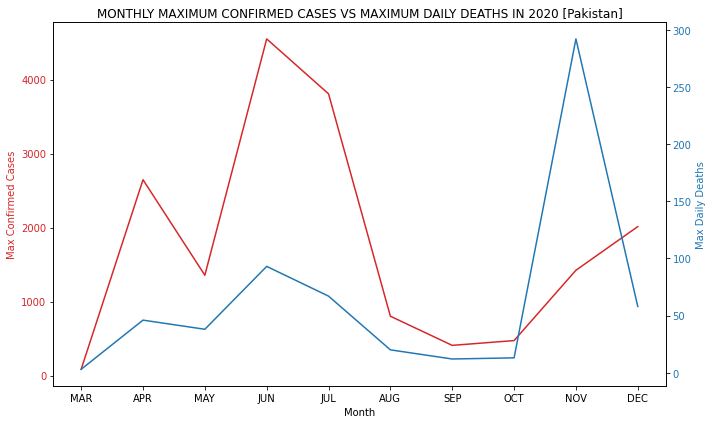

In [27]:
count = 0
x = []
y = []
z = []
for i in range(3,13):
    df_month = all_prov_df.loc[(all_prov_df['Month'] == i) 
                                     & (all_prov_df['Year'] == 2020)]


    %matplotlib inline

    # Create the plot
    x.append(df_month["Daily_Confirmed"].max())
    y.append(df_month["Daily_Deaths"].max())
    z.append(month[i])
fig, ax1 = plt.subplots(figsize = (10,6))

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Max Confirmed Cases', color=color)
ax1.plot(z, x, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Max Daily Deaths', color=color)  
ax2.plot(z, y, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title(f"MONTHLY MAXIMUM CONFIRMED CASES VS MAXIMUM DAILY DEATHS IN 2020 [Pakistan]")
fig.tight_layout()  
plt.show()

## Comparision of Maximum Confirmed Cases and Maximum Daily Deaths [Monthly in 2021]

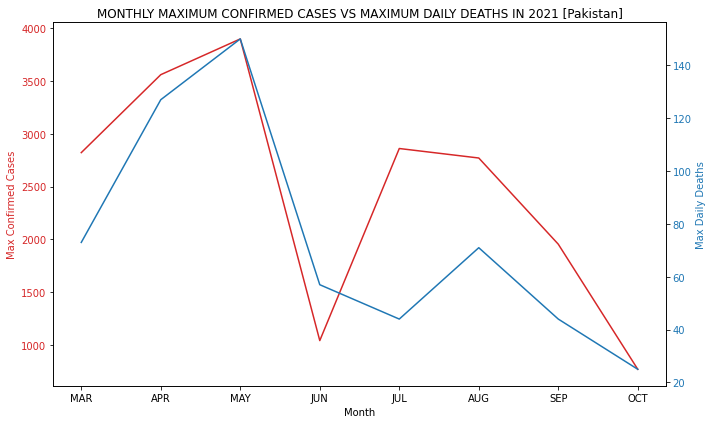

In [29]:
count = 0
x = []
y = []
z = []
for i in range(3,13):
    df_month = all_prov_df.loc[(all_prov_df['Month'] == i) 
                                     & (all_prov_df['Year'] == 2021)]


    %matplotlib inline

    # Create the plot
    x.append(df_month["Daily_Confirmed"].max())
    y.append(df_month["Daily_Deaths"].max())
    z.append(month[i])
fig, ax1 = plt.subplots(figsize = (10,6))

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Max Confirmed Cases', color=color)
ax1.plot(z, x, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Max Daily Deaths', color=color)  
ax2.plot(z, y, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title(f"MONTHLY MAXIMUM CONFIRMED CASES VS MAXIMUM DAILY DEATHS IN 2021 [Pakistan]")
fig.tight_layout()  
plt.show()

# Daily Confirmed Cases VS Provinces [03/10/2020 to 10/18/2021]

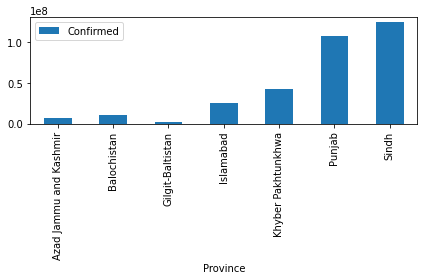

In [60]:
all_prov_df.pivot_table(values = 'Confirmed', index = 'Province', aggfunc='sum').plot(kind='bar')
plt.tight_layout()
plt.show()

## Comparision of Monthly Mean Infections and Mean Daily Deaths in 2020

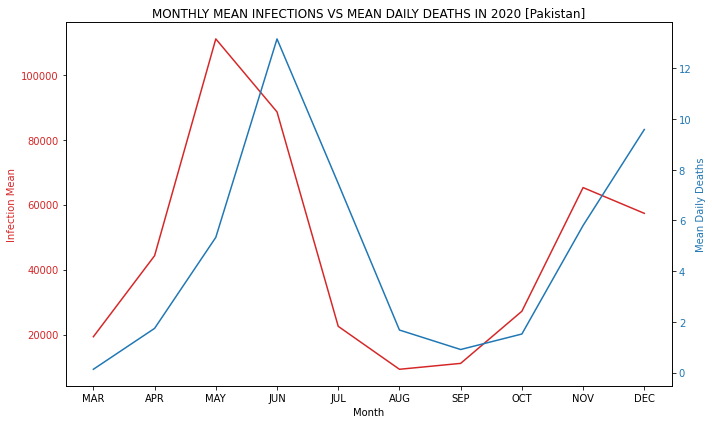

In [30]:
count = 0
x = []
y = []
z = []
for i in range(3,13):
    df_month = all_prov_df.loc[(all_prov_df['Month'] == i) 
                                     & (all_prov_df['Year'] == 2020)]


    %matplotlib inline

    # Create the plot
    x.append(df_month["inf_mean"].mean())
    y.append(df_month["Daily_Deaths"].mean())
    z.append(month[i])
fig, ax1 = plt.subplots(figsize = (10,6))

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Infection Mean', color=color)
ax1.plot(z, x, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Mean Daily Deaths', color=color)  
ax2.plot(z, y, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title(f"MONTHLY MEAN INFECTIONS VS MEAN DAILY DEATHS IN 2020 [Pakistan]")
fig.tight_layout()  
plt.show()

## Comparision of Monthly Mean Infections and Mean Daily Deaths in 2021

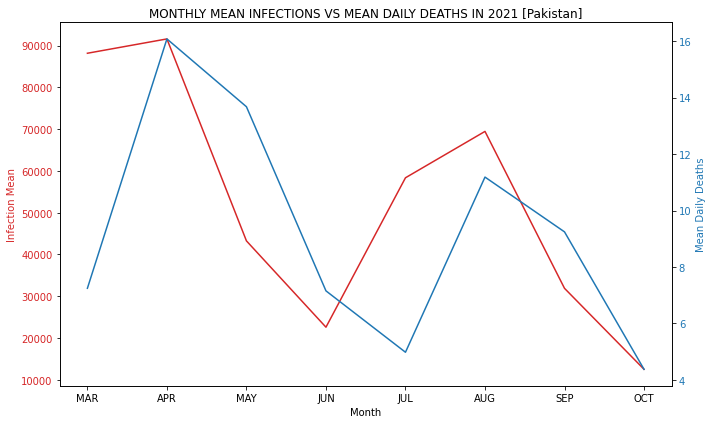

In [39]:
count = 0
x = []
y = []
z = []
for i in range(3,13):
    df_month = all_prov_df.loc[(all_prov_df['Month'] == i) 
                                     & (all_prov_df['Year'] == 2021)]


    %matplotlib inline

    # Create the plot
    x.append(df_month["inf_mean"].mean())
    y.append(df_month["Daily_Deaths"].mean())
    z.append(month[i])
fig, ax1 = plt.subplots(figsize = (10,6))

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Infection Mean', color=color)
ax1.plot(z, x, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Mean Daily Deaths', color=color)  
ax2.plot(z, y, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title(f"MONTHLY MEAN INFECTIONS VS MEAN DAILY DEATHS IN 2021 [Pakistan]")
fig.tight_layout()  
plt.show()

# Daily Deaths VS Provinces [03/10/2020 to 10/18/2021]

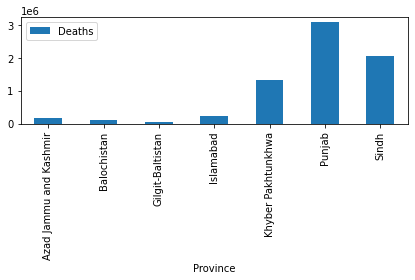

In [59]:
all_prov_df.pivot_table(values = 'Deaths', index = 'Province', aggfunc='sum').plot(kind='bar')
plt.tight_layout()
plt.show()

## Comparision of Mean Confirmed Cases and Mean Temperature [Monthly in 2020]

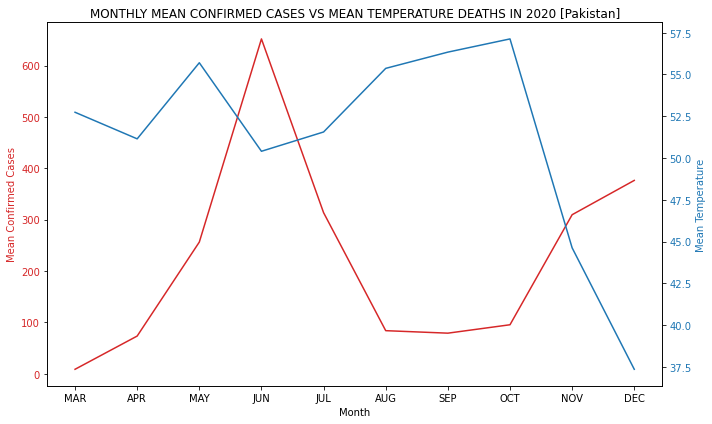

In [37]:
count = 0
x = []
y = []
z = []
for i in range(3,13):
    df_month = all_prov_df.loc[(all_prov_df['Month'] == i) 
                                     & (all_prov_df['Year'] == 2020)]


    %matplotlib inline

    # Create the plot
    x.append(df_month["Daily_Confirmed"].mean())
    y.append(df_month["Temp"].mean())
    z.append(month[i])
fig, ax1 = plt.subplots(figsize = (10,6))

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Mean Confirmed Cases', color=color)
ax1.plot(z, x, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Mean Temperature', color=color)  
ax2.plot(z, y, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title(f"MONTHLY MEAN CONFIRMED CASES VS MEAN TEMPERATURE DEATHS IN 2020 [Pakistan]")
fig.tight_layout()  
plt.show()

## Comparision of Mean Confirmed Cases and Mean Temperature [Monthly in 2021]

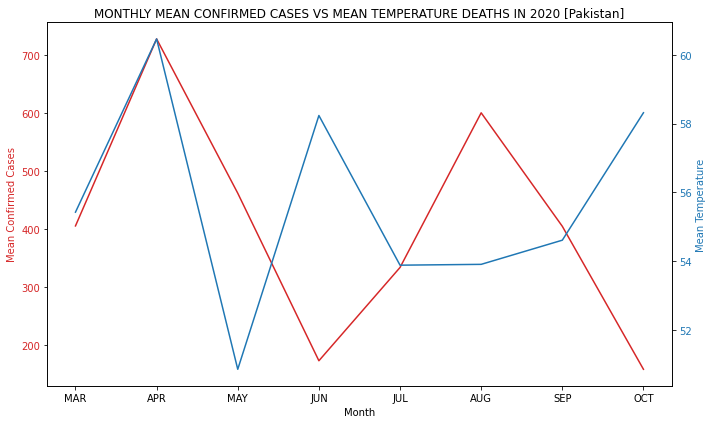

In [38]:
count = 0
x = []
y = []
z = []
for i in range(3,13):
    df_month = all_prov_df.loc[(all_prov_df['Month'] == i) 
                                     & (all_prov_df['Year'] == 2021)]


    %matplotlib inline

    # Create the plot
    x.append(df_month["Daily_Confirmed"].mean())
    y.append(df_month["Temp"].mean())
    z.append(month[i])
fig, ax1 = plt.subplots(figsize = (10,6))

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Mean Confirmed Cases', color=color)
ax1.plot(z, x, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Mean Temperature', color=color)  
ax2.plot(z, y, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title(f"MONTHLY MEAN CONFIRMED CASES VS MEAN TEMPERATURE DEATHS IN 2020 [Pakistan]")
fig.tight_layout()  
plt.show()

# Mean Mask Usage VS Provinces [03/10/2020 to 10/18/2021]

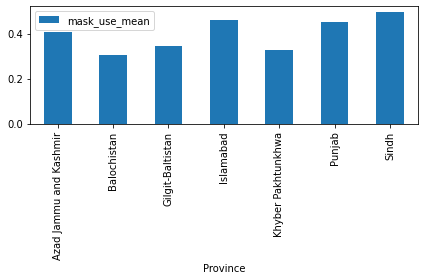

In [63]:
all_prov_df.pivot_table(values = 'mask_use_mean', index = 'Province', aggfunc='mean').plot(kind='bar')
plt.tight_layout()
plt.show()

## Comparision of Mean Daily Confirmed Cases and Mean Visibility Statistics [Monthly in 2020]

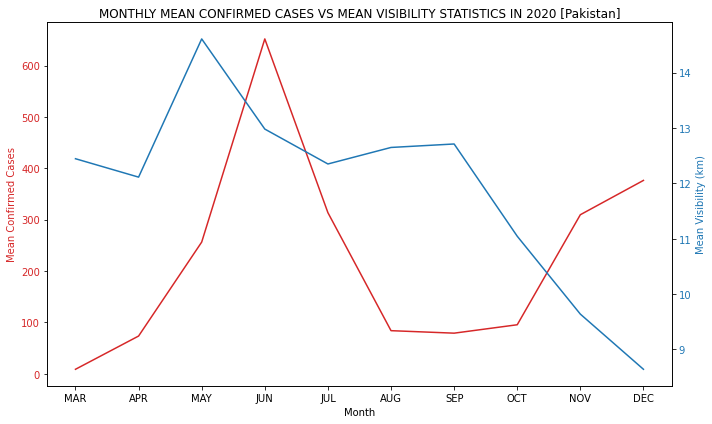

In [24]:
count = 0
x = []
y = []
z = []
for i in range(3,13):
    df_month = all_prov_df.loc[(all_prov_df['Month'] == i) 
                                     & (all_prov_df['Year'] == 2020)]


    %matplotlib inline

    # Create the plot
    x.append(df_month["Daily_Confirmed"].mean())
    y.append(df_month["Visibility"].mean())
    z.append(month[i])
fig, ax1 = plt.subplots(figsize = (10,6))

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Mean Confirmed Cases', color=color)
ax1.plot(z, x, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Mean Visibility (km)', color=color)  
ax2.plot(z, y, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title(f"MONTHLY MEAN CONFIRMED CASES VS MEAN VISIBILITY STATISTICS IN 2020 [Pakistan]")
fig.tight_layout()  
plt.show()

## Comparision of Mean Daily Confirmed Cases and Mean Visibility Statistics [Monthly in 2021]

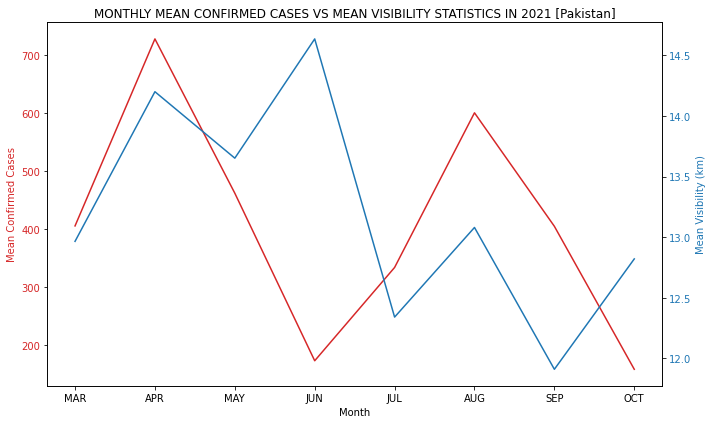

In [26]:
count = 0
x = []
y = []
z = []
for i in range(3,13):
    df_month = all_prov_df.loc[(all_prov_df['Month'] == i) 
                                     & (all_prov_df['Year'] == 2021)]


    %matplotlib inline

    # Create the plot
    x.append(df_month["Daily_Confirmed"].mean())
    y.append(df_month["Visibility"].mean())
    z.append(month[i])
fig, ax1 = plt.subplots(figsize = (10,6))

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Mean Confirmed Cases', color=color)
ax1.plot(z, x, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Mean Visibility (km)', color=color)  
ax2.plot(z, y, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title(f"MONTHLY MEAN CONFIRMED CASES VS MEAN VISIBILITY STATISTICS IN 2021 [Pakistan]")
fig.tight_layout()  
plt.show()

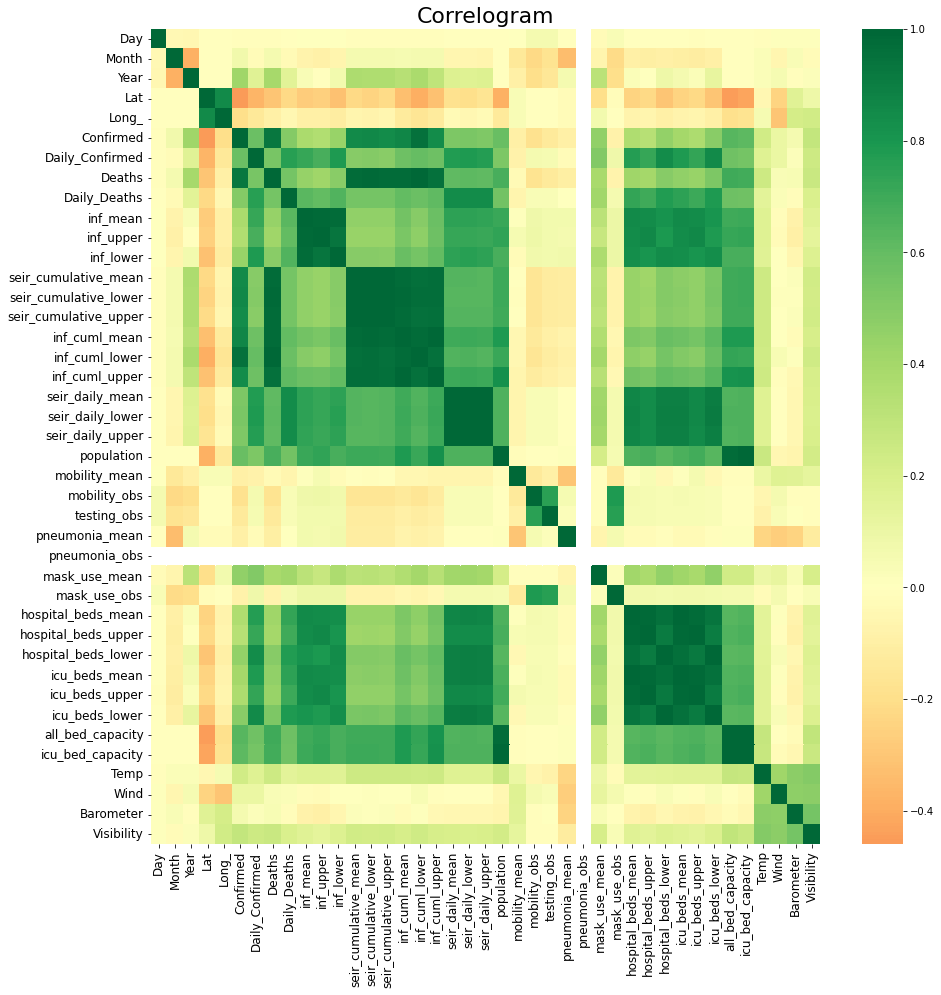

In [8]:
# Plot
plt.figure(figsize=(15,15))
sns.heatmap(all_prov_df.corr(), xticklabels = all_prov_df.corr().columns, yticklabels = all_prov_df.corr().columns, cmap='RdYlGn', center=0)

# Decorations
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [11]:
print(all_prov_df.corr(method = "pearson"))

                                Day         Month  ...  Barometer  Visibility
Day                    1.000000e+00 -4.058198e-02  ...   0.011047    0.011434
Month                 -4.058198e-02  1.000000e+00  ...   0.035715   -0.024596
Year                  -4.774877e-02 -3.823381e-01  ...  -0.015034    0.020849
Lat                    1.093942e-17 -2.827161e-18  ...   0.160471    0.088478
Long_                 -5.050540e-18 -2.160367e-17  ...   0.217904    0.233670
Confirmed             -1.040881e-02  7.095786e-02  ...   0.055801    0.285752
Daily_Confirmed       -5.092372e-03 -2.149716e-02  ...   0.019907    0.247924
Deaths                -9.621534e-03  6.044572e-02  ...   0.043386    0.260496
Daily_Deaths           1.223258e-03 -3.741202e-02  ...  -0.019492    0.194332
inf_mean               4.943839e-03 -7.555412e-02  ...  -0.080599    0.155843
inf_upper              6.204300e-03 -8.520941e-02  ...  -0.091607    0.138074
inf_lower              2.566085e-03 -6.339089e-02  ...  -0.06024

## Correlated Features to look upon :

In [18]:
 s = all_prov_df.corr(method = "pearson").loc['Daily_Confirmed'].drop("Daily_Confirmed")
print(s[s.abs() >= 0.7])

Daily_Deaths           0.758453
inf_mean               0.718961
inf_lower              0.785037
seir_daily_mean        0.772985
seir_daily_lower       0.781641
seir_daily_upper       0.766262
hospital_beds_mean     0.769559
hospital_beds_upper    0.719545
hospital_beds_lower    0.850936
icu_beds_mean          0.782566
icu_beds_upper         0.727627
icu_beds_lower         0.852129
Name: Daily_Confirmed, dtype: float64


In [19]:
 s = all_prov_df.corr(method = "pearson").loc['Daily_Deaths'].drop("Daily_Deaths")
print(s[s.abs() >= 0.7])

Daily_Confirmed        0.758453
seir_daily_mean        0.844965
seir_daily_lower       0.847276
seir_daily_upper       0.842671
hospital_beds_mean     0.729850
hospital_beds_lower    0.772621
icu_beds_mean          0.747382
icu_beds_upper         0.708074
icu_beds_lower         0.779993
Name: Daily_Deaths, dtype: float64
